## BPM

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

import pandas as pd
# source the nxcals python libs
from nxcals.api.extraction.data.builders import *
from scipy.optimize import curve_fit
from datetime import datetime

In [2]:
def gaussian_function(x, a, I, mu, sig):
    return a + I / np.sqrt(2 * np.pi * sig ** 2) * np.exp(-(x - mu) ** 2 / 2. / sig ** 2)

def do_gaussian_fit(x,y):
    mu = np.average(x, weights=np.abs(y - np.min(y)))
    sigma = np.sqrt(np.average(x**2, weights=np.abs(y - np.min(y))) - mu**2)
    p0 = [y.min(), (np.max(y) - np.min(y)) * np.sqrt(2 * np.pi * sigma**2), mu, sigma]
    popt, pcov = curve_fit(gaussian_function, x, y, p0=p0, maxfev=10000) # maxfev is the number of tries it does the fit
    return popt, pcov

In [94]:
# build the query and load data into spark dataframe UTC Time from MD
start = "2022-07-13 14:20:55.000"
end = "2022-07-13 14:32:00.000"
df = DevicePropertyDataQuery.builder(spark).system("CMW").startTime(start).endTime(end).entity().parameter("IRRAD_BPM1/Acquisition").build().toPandas()

In [95]:
df.head(2)

__record_timestamp__  __record_version__             acqStamp      class  \
0   1657722078000000000                   0  1657722078000000000  IRRAD_BPM   
1   1657722091000000000                   0  1657722091000000000  IRRAD_BPM   

   cyclestamp      device                                          intensity  \
0           0  IRRAD_BPM1  {'elements': [0.024449952, 0.024324952, 0.0248...   
1           0  IRRAD_BPM1  {'elements': [0.024324952, 0.024324952, 0.0269...   

      property selector                                                  x  \
0  Acquisition     None  {'elements': [-4.5, -4.5, 0.0, -9.0, 0.0, -9.0...   
1  Acquisition     None  {'elements': [-4.5, -4.5, 0.0, -9.0, 0.0, -9.0...   

                                                   y  nxcals_entity_id  
0  {'elements': [-9.0, -4.5, -9.0, -9.0, -13.5, -...          51590199  
1  {'elements': [-9.0, -4.5, -9.0, -9.0, -13.5, -...          51590199

In [96]:
df.keys()

Index(['__record_timestamp__', '__record_version__', 'acqStamp', 'class',
       'cyclestamp', 'device', 'intensity', 'property', 'selector', 'x', 'y',
       'nxcals_entity_id'],
      dtype='object')

In [97]:
Z = df.intensity[0]["elements"]
print(Z)

[0.02444995 0.02432495 0.02482495 0.02432495 0.02444995 0.02444995
 0.02432495 0.02432495 0.02432495 0.02444995 0.02444995 0.03382495
 0.02432495 0.02657495 0.02444995 0.02432495 0.02432495 0.02807495
 0.02432495 0.03044995 0.04294995 0.02457495 0.05132495 0.02569995
 0.12919995 0.02507495 0.05094995 0.02669995 0.03582495 0.02669995
 0.04557495 0.03244995 0.03494995 0.03619995 0.03607495 0.03557495
 0.04119995 0.03744995 0.03807495]


(array([26.,  9.,  3.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([0.02432495, 0.03481245, 0.04529995, 0.05578745, 0.06627495,
        0.07676245, 0.08724995, 0.09773745, 0.10822495, 0.11871245,
        0.12919995]),
 <BarContainer object of 10 artists>)

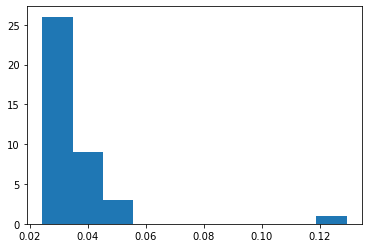

In [98]:
fig, ax = plt.subplots()
ax.hist(Z)

In [99]:
x = df.x[0]["elements"]
print(len(x))
print(x)

39
[ -4.5  -4.5   0.   -9.    0.   -9.    0.  -13.5   4.5 -13.5   4.5  18.
   9.   13.5   9.   13.5  13.5   9.    4.5  13.5 -18.   13.5 -13.5   9.
  -9.    9.   -4.5   4.5   0.    4.5 -13.5   0.  -13.5   0.   -9.    0.
  -9.   -4.5  -4.5]


In [100]:
y = df.y[0]["elements"]
print(len(y))
print(y)

39
[ -9.   -4.5  -9.   -9.  -13.5  -4.5  -4.5  -9.   -9.   -4.5  -4.5   0.
  -9.    0.   -4.5  -4.5  -9.    0.    0.    4.5   0.    9.    0.    4.5
   0.    9.    0.    4.5   0.    9.    4.5   4.5   9.   13.5   4.5   9.
   9.    9.    4.5]


In [101]:
# for i in range(len(df)):
#     fig, ax = plt.subplots()

#     x = df.x[i]["elements"]
#     y = df.y[i]["elements"]
#     z = df.intensity[i]["elements"]

#     ax.scatter(x,y, c=z/z.max(), cmap="plasma",vmin=0, vmax=1)
#     ax.set_title("BPM")
#     ax.set_xlabel("mm")
#     ax.set_ylabel("mm")

Text(0, 0.5, 'mm')

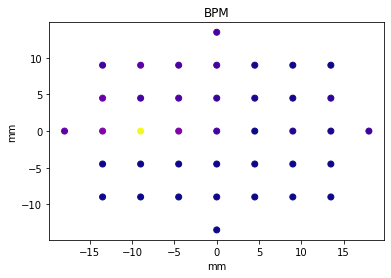

In [102]:
fig, ax = plt.subplots()

x = df.x[0]["elements"]
y = df.y[0]["elements"]
z = df.intensity[0]["elements"]

ax.scatter(x,y, c=z/z.max(), cmap="plasma")
ax.set_title("BPM")
ax.set_xlabel("mm")

ax.set_ylabel("mm")

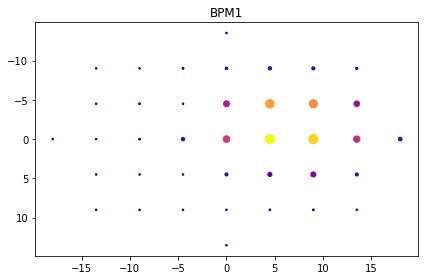

In [109]:
j = 30
x = df.iloc[j].x["elements"]
y = df.iloc[j].y["elements"]
z = df.iloc[j].intensity["elements"]


x_fix = []
y_fix = []
z_fix = []

for i in range(18):
    x_fix.append(x[i])
    y_fix.append(y[i])
    z_fix.append(z[i])
for i in range(20):
    i=i+18
    x_fix.append(x[i])
    y_fix.append(y[i])
    z_fix.append(z[i+1])
x_fix.append(x[-1])
y_fix.append(y[-1])
z_fix.append(z[18])

z_fix = np.array(z_fix)

fig, ax = plt.subplots(tight_layout=True)
ax.scatter(x_fix, y_fix, c=z_fix, s=z_fix*100, cmap="plasma")
ax.set_title("BPM1")
ax.invert_yaxis()

### Background

Text(0.5, 1.0, 'BPM1')

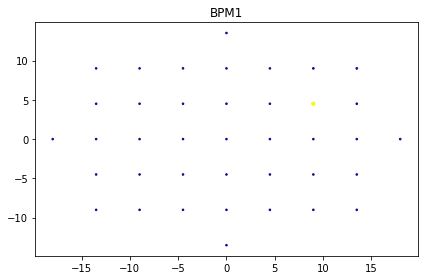

In [157]:
j = 3
x = df.iloc[j].x["elements"]
y = df.iloc[j].y["elements"]
z = df.iloc[j].intensity["elements"]


x_fix_background = []
y_fix_background = []
z_fix_background = []

for i in range(18):
    x_fix_background.append(x[i])
    y_fix_background.append(y[i])
    z_fix_background.append(z[i])
for i in range(20):
    i=i+18
    x_fix_background.append(x[i])
    y_fix_background.append(y[i])
    z_fix_background.append(z[i+1])
x_fix_background.append(x[-1])
y_fix_background.append(y[-1])
z_fix_background.append(z[18])

z_fix_background = np.array(z_fix_background)

fig, ax = plt.subplots(tight_layout=True)
ax.scatter(x_fix_background, y_fix_background, c=z_fix_background, s=z_fix_background*100, cmap="plasma")
ax.set_title("BPM1")

In [110]:
bpm_df = pd.DataFrame()
for i in range(len(x_fix)):
    df2 = pd.DataFrame({"x": [x_fix[i]],
                          "y": [y_fix[i]],
                           "intensity": [z_fix[i]],
                          })
    
    bpm_df = pd.concat([bpm_df, df2])
bpm_df.head(5)

x     y  intensity
0 -4.5  -9.0   0.036700
0 -4.5  -4.5   0.024325
0  0.0  -9.0   0.072450
0 -9.0  -9.0   0.024450
0  0.0 -13.5   0.024450

In [111]:
bpm_df.sort_values(by=['x'])

x     y  intensity
0 -18.0   0.0   0.024450
0 -13.5   9.0   0.024450
0 -13.5   4.5   0.024450
0 -13.5  -9.0   0.024325
0 -13.5  -4.5   0.024450
0 -13.5   0.0   0.024450
0  -9.0   9.0   0.024450
0  -9.0   4.5   0.024450
0  -9.0  -9.0   0.024450
0  -9.0  -4.5   0.032075
0  -9.0   0.0   0.035325
0  -4.5  -9.0   0.036700
0  -4.5   0.0   0.119950
0  -4.5   9.0   0.024450
0  -4.5   4.5   0.024325
0  -4.5  -4.5   0.024325
0   0.0 -13.5   0.024450
0   0.0  -4.5   0.354325
0   0.0   9.0   0.026200
0   0.0   0.0   0.449325
0   0.0  -9.0   0.072450
0   0.0  13.5   0.024450
0   0.0   4.5   0.098450
0   4.5   9.0   0.032575
0   4.5   4.5   0.172700
0   4.5  -9.0   0.114575
0   4.5  -4.5   0.730700
0   4.5   0.0   0.930575
0   9.0  -4.5   0.680575
0   9.0  -9.0   0.104200
0   9.0   0.0   0.851825
0   9.0   9.0   0.032825
0   9.0   4.5   0.258700
0  13.5  -4.5   0.311325
0  13.5   9.0   0.024950
0  13.5   0.0   0.406075
0  13.5  -9.0   0.052825
0  13.5   4.5   0.096825
0  18.0   0.0   0.137950

In [112]:
np.sort(bpm_df.x.unique())

array([-18. , -13.5,  -9. ,  -4.5,   0. ,   4.5,   9. ,  13.5,  18. ])

In [113]:
bpm_df.x.unique()[0]

-4.5

In [114]:
bpm_df.loc[bpm_df.x == -4.5].intensity

0    0.036700
0    0.024325
0    0.119950
0    0.024450
0    0.024325
Name: intensity, dtype: float64

In [115]:
h_proj = []
for i in range(len((bpm_df.x.unique()))):
    proj = bpm_df.loc[bpm_df.x == np.sort(bpm_df.x.unique())[i]].intensity.sum()
    h_proj.append(proj)
h_proj

[0.024449952,
 0.12212476,
 0.140749756,
 0.22974975600000003,
 1.049649666,
 1.9811247740000002,
 1.928124742,
 0.891999741,
 0.13794996]

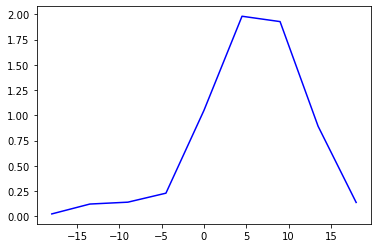

In [116]:
fig, ax = plt.subplots()
ax.plot(np.sort(bpm_df.x.unique()), h_proj, color="b")

Text(0, 0.5, 'mm')

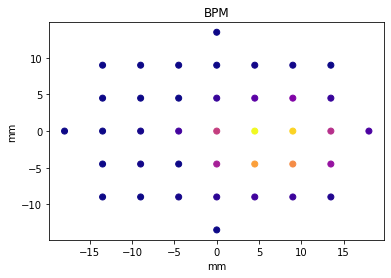

In [132]:
fig, ax = plt.subplots()

ax.scatter(bpm_df.x, bpm_df.y, c=bpm_df.intensity/bpm_df.intensity.max(), cmap="plasma")
ax.set_title("BPM")
ax.set_xlabel("mm")
ax.set_ylabel("mm")

In [133]:
np.sort(bpm_df.y.unique())

array([-13.5,  -9. ,  -4.5,   0. ,   4.5,   9. ,  13.5])

In [134]:
v_proj = []
for i in range(len((bpm_df.y.unique()))):
    proj = bpm_df.loc[bpm_df.y == np.sort(bpm_df.y.unique())[i]].intensity.sum()
    v_proj.append(proj)
v_proj

[0.024449952,
 0.429524658,
 2.1577746540000002,
 2.979924564,
 0.699899666,
 0.189899661,
 0.024449952]

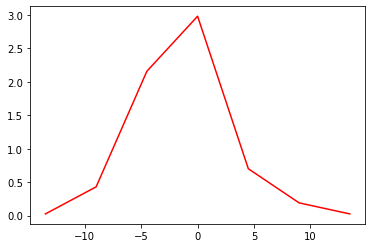

In [135]:
fig, ax = plt.subplots()
ax.plot(np.sort(bpm_df.y.unique()), v_proj, color="r")

<ipython-input-177-750504da5984>:52: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1,3, figsize=(20,5))


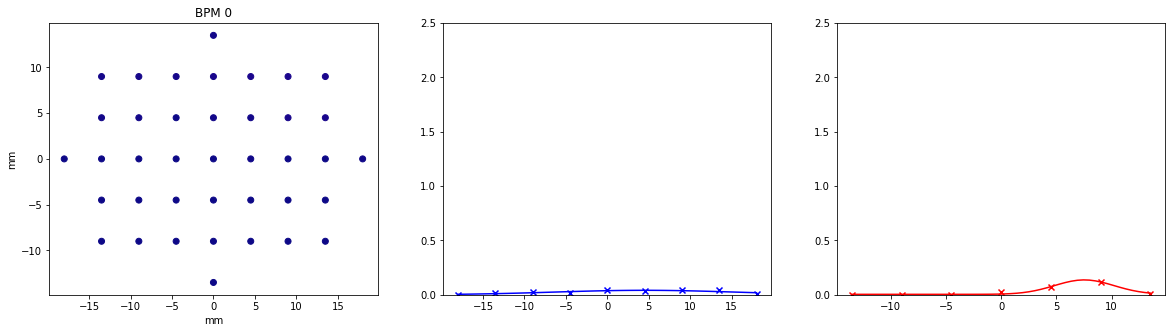

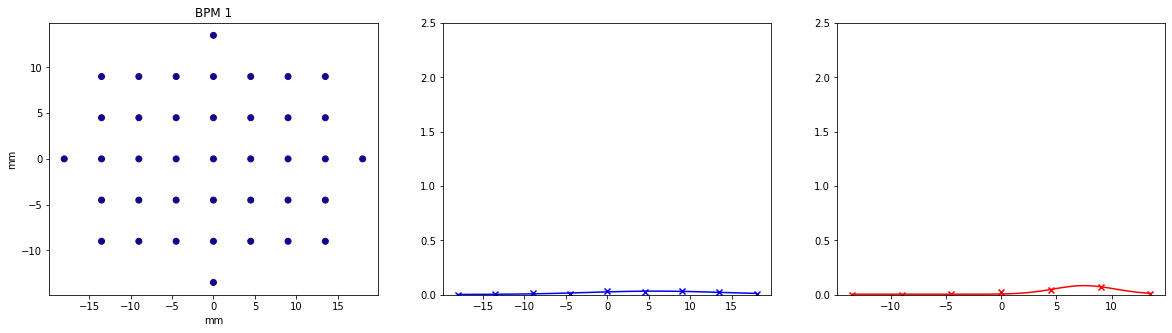

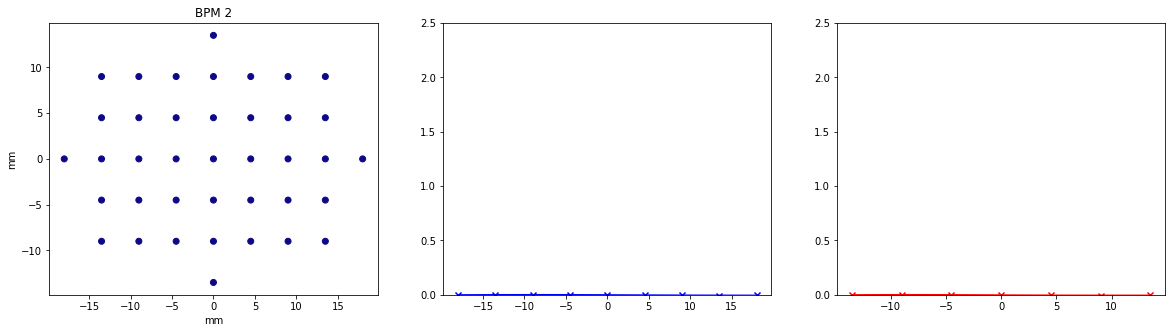

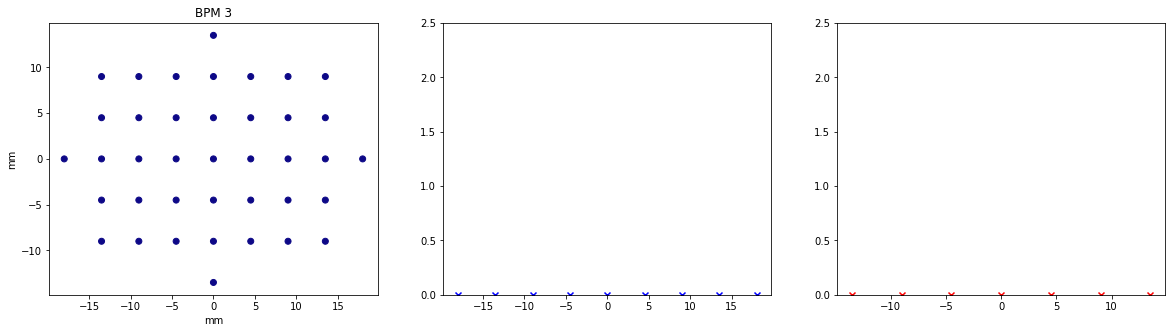

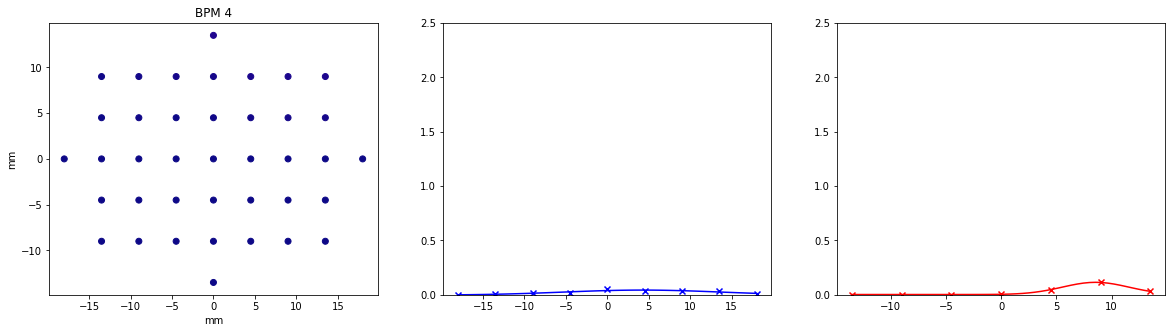

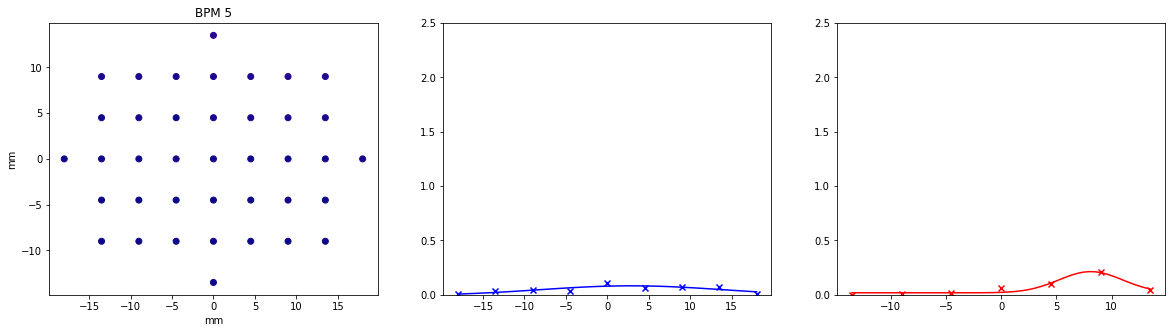

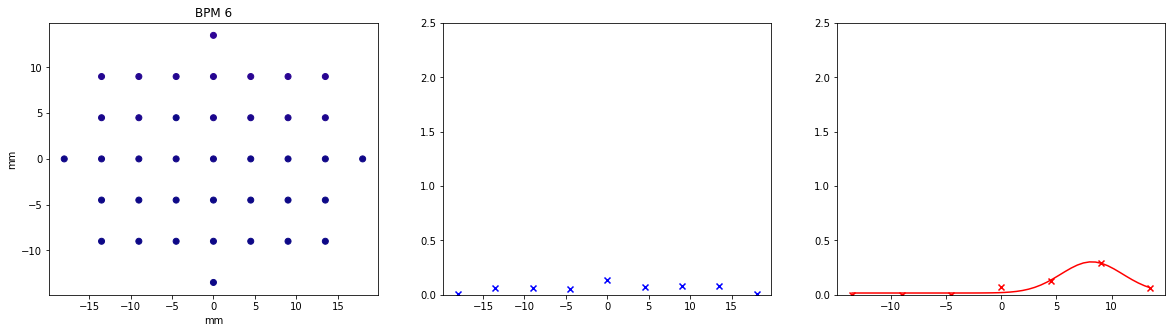

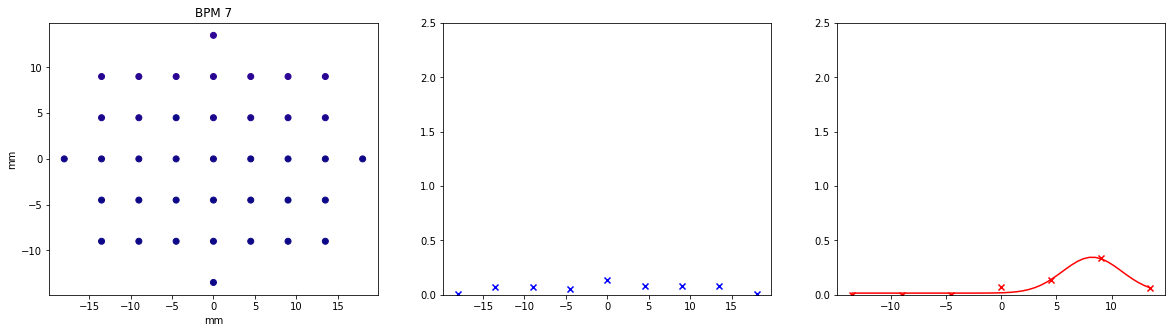

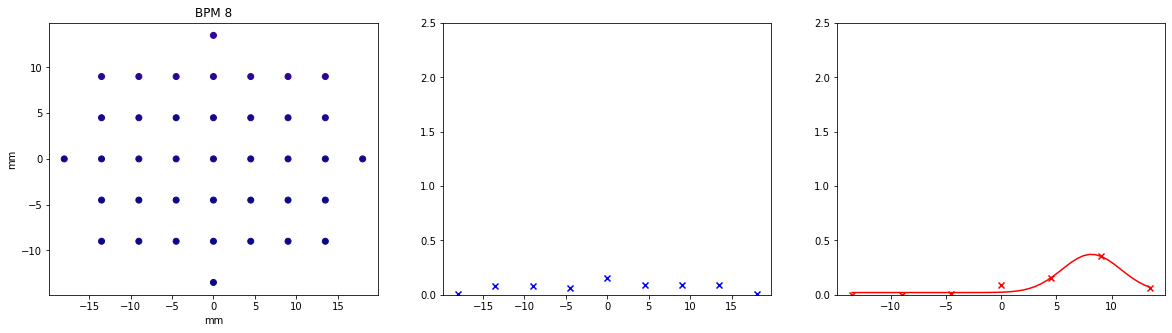

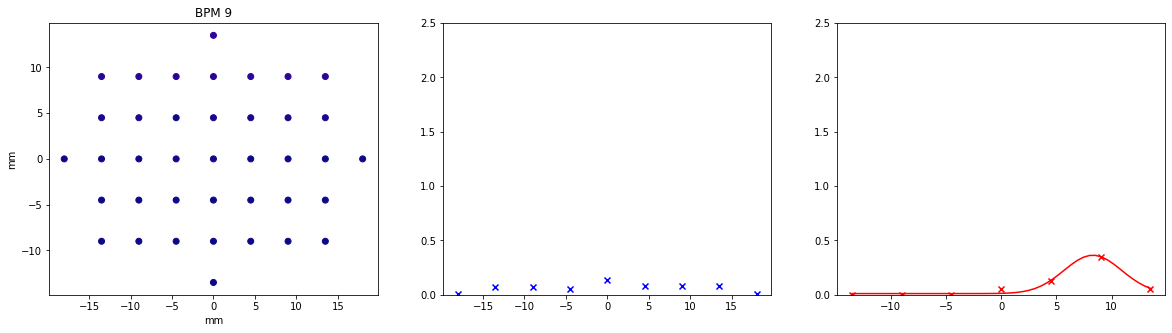

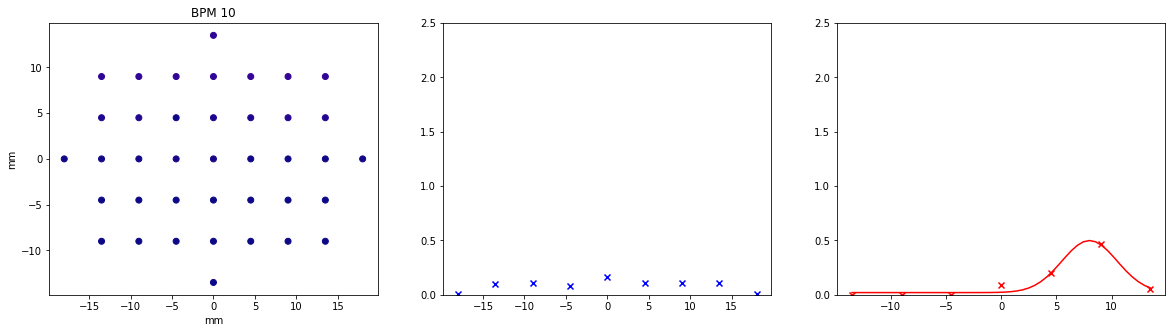

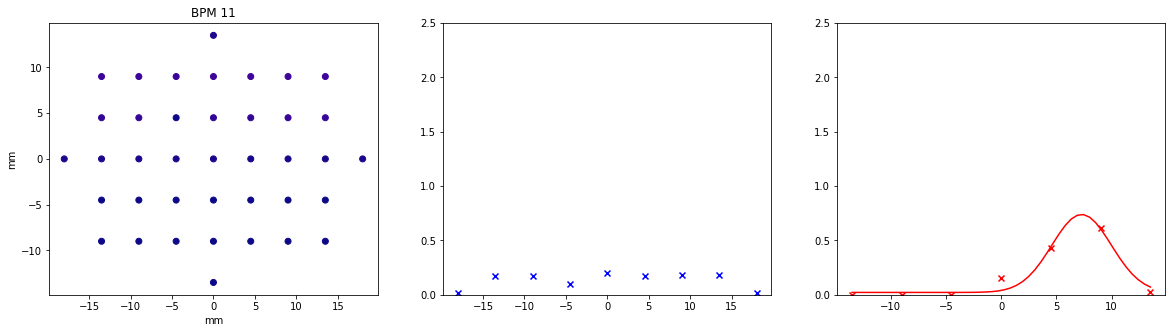

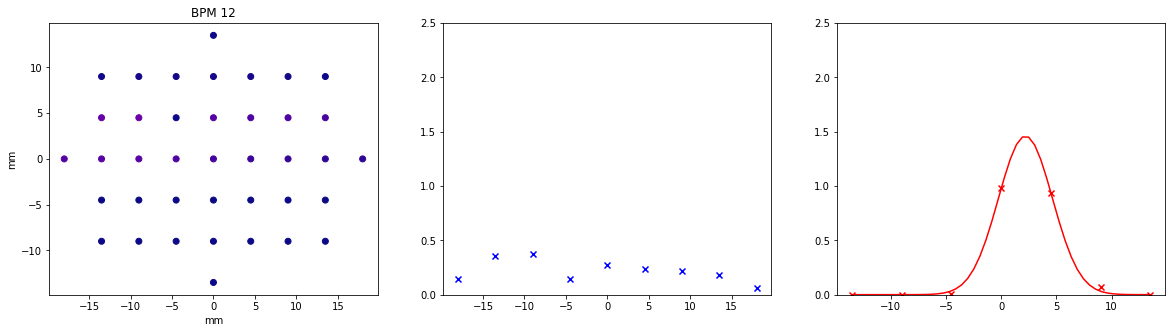

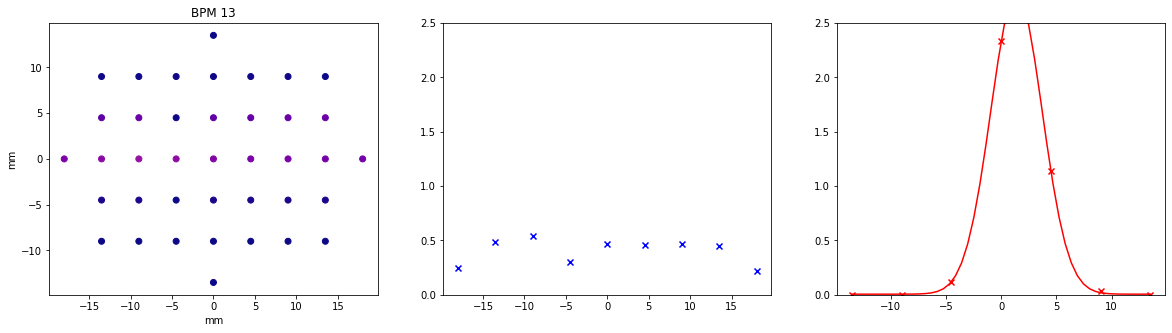

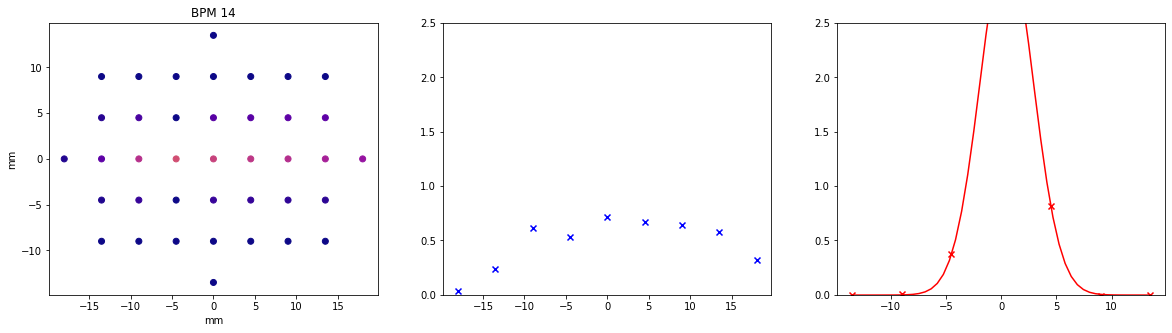

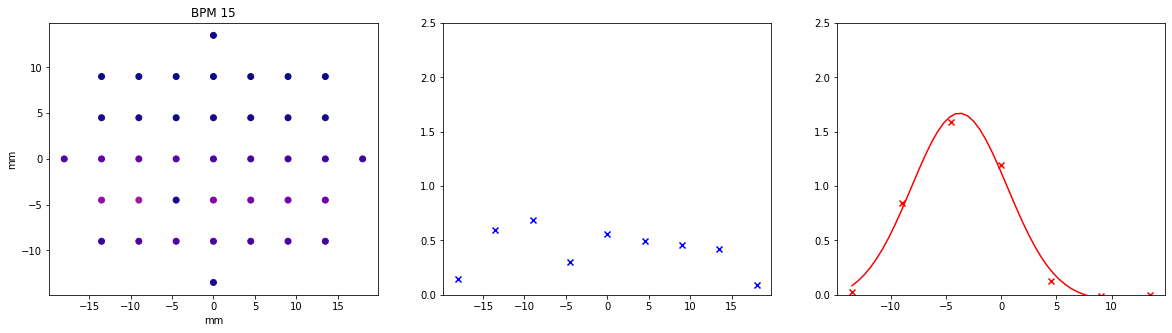

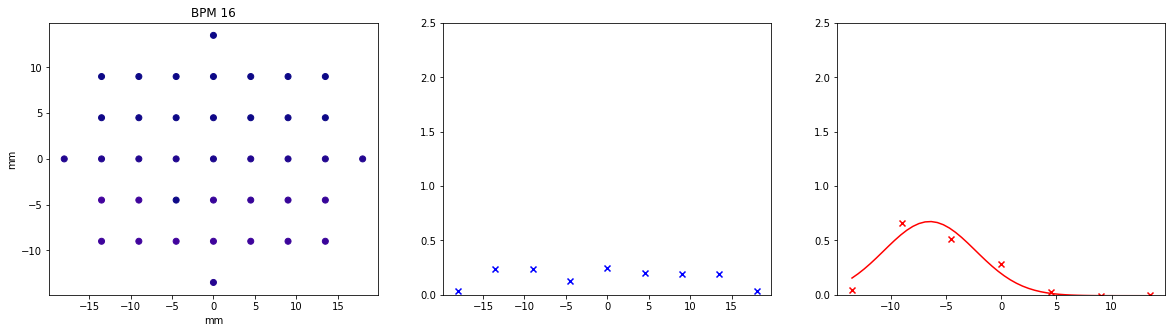

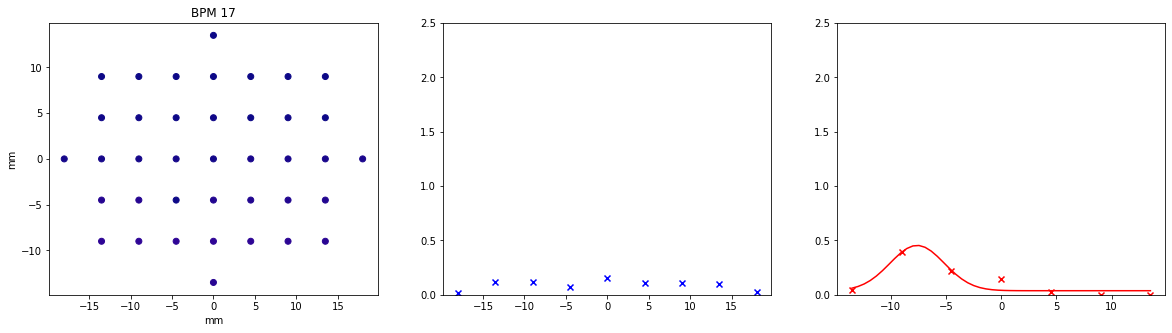

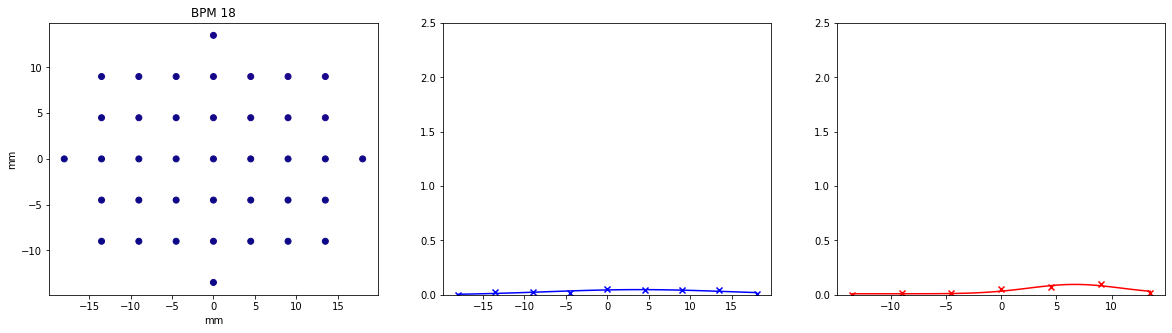

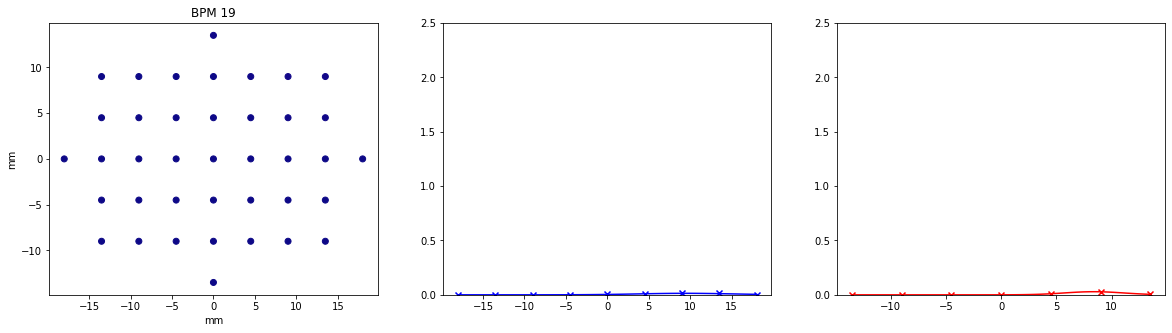

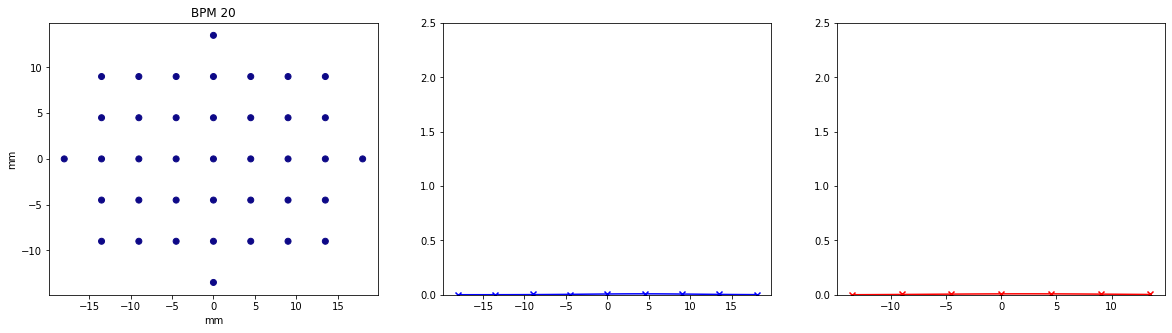

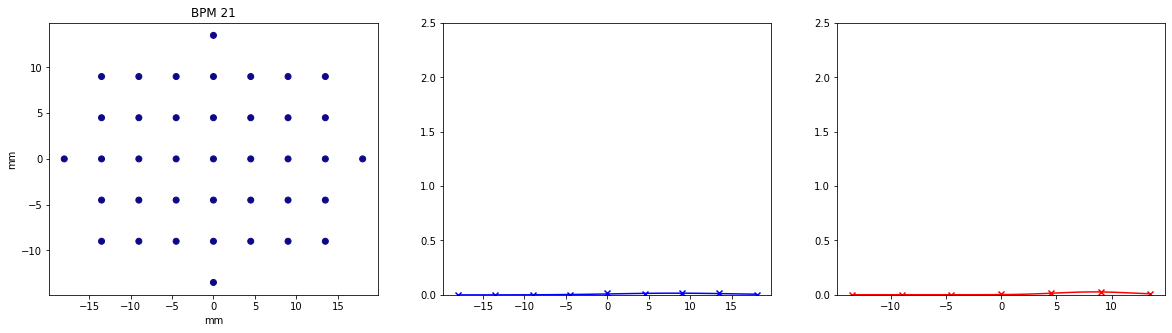

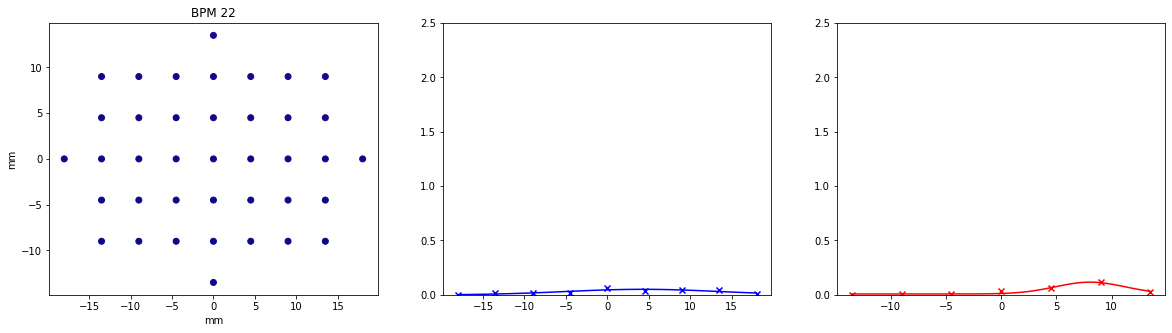

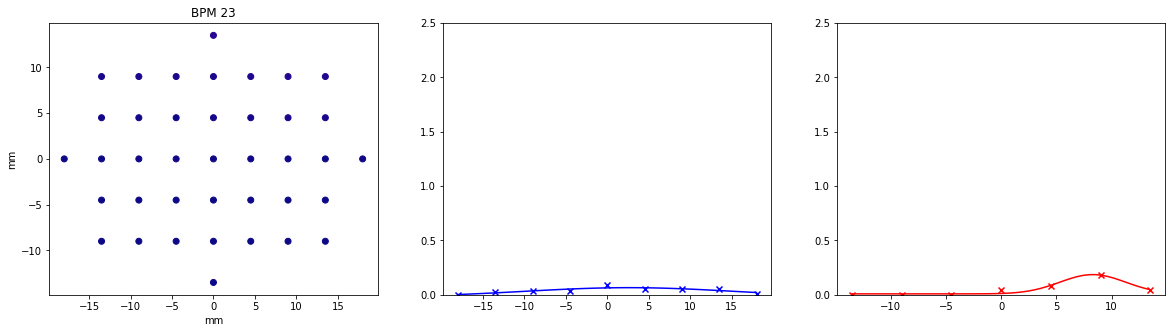

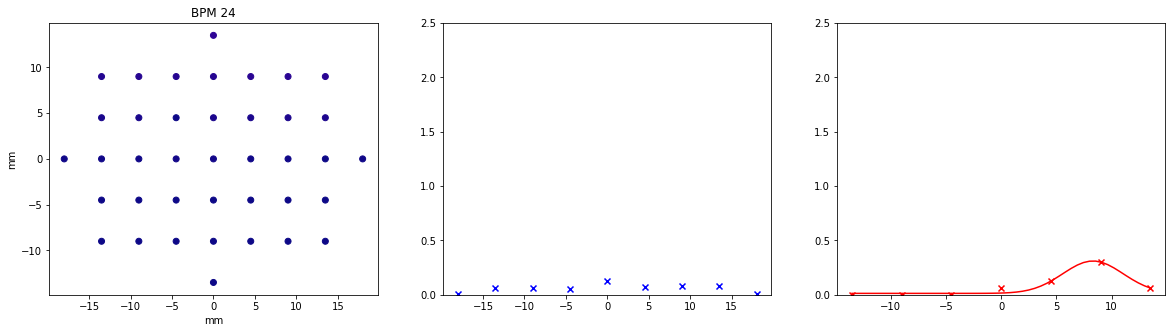

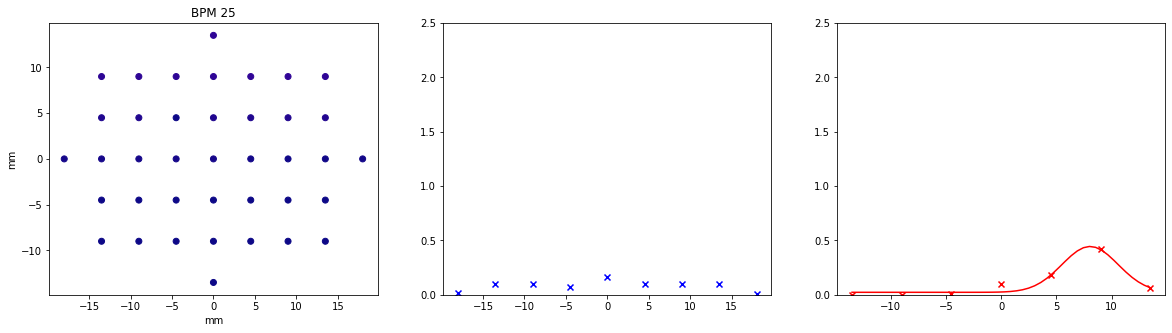

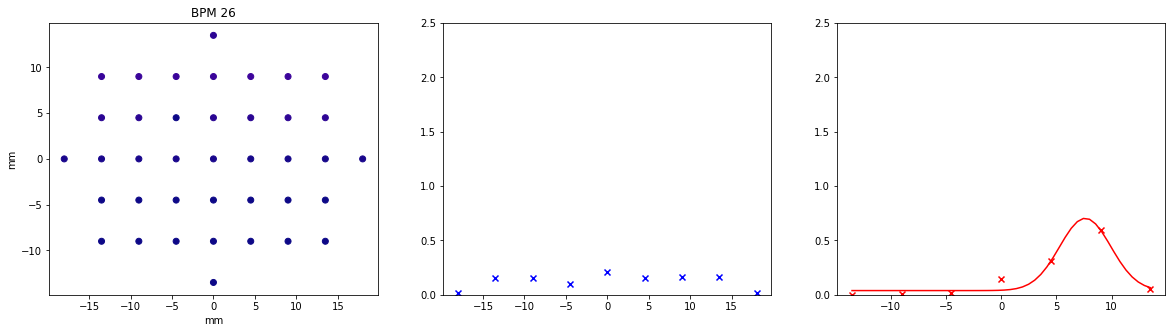

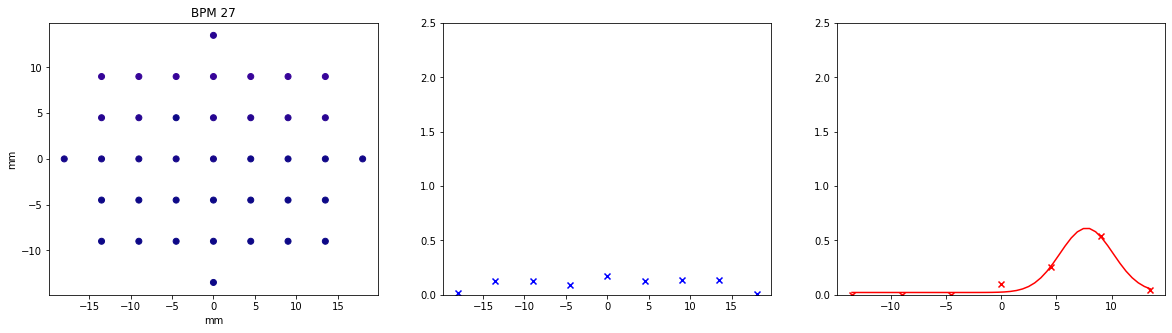

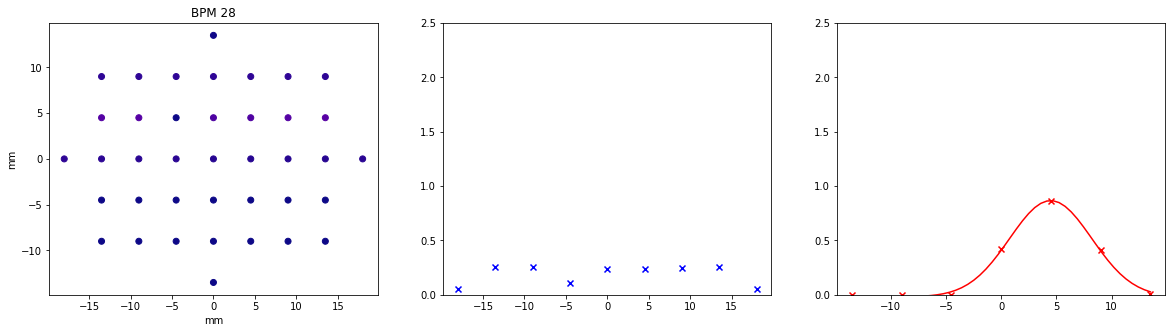

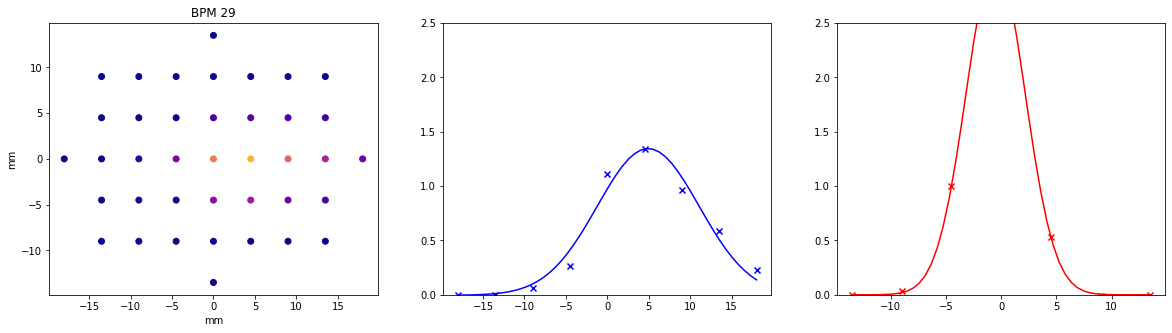

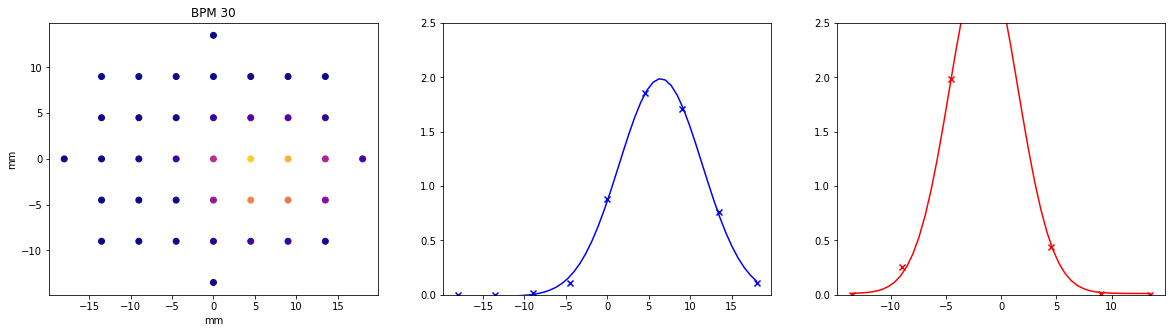

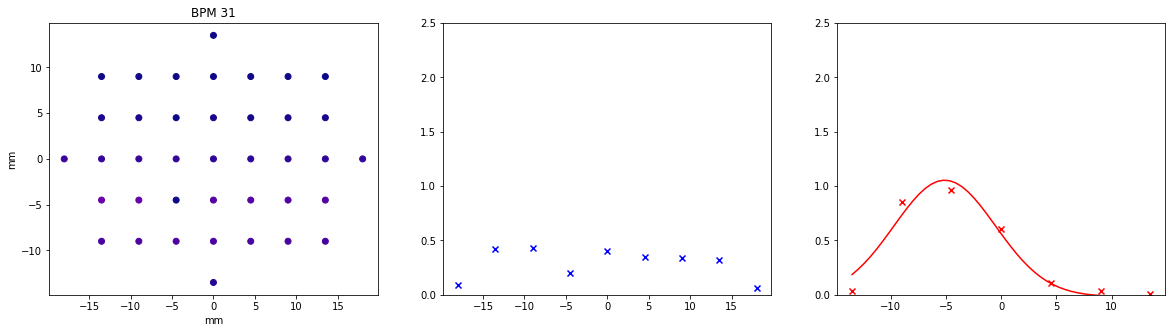

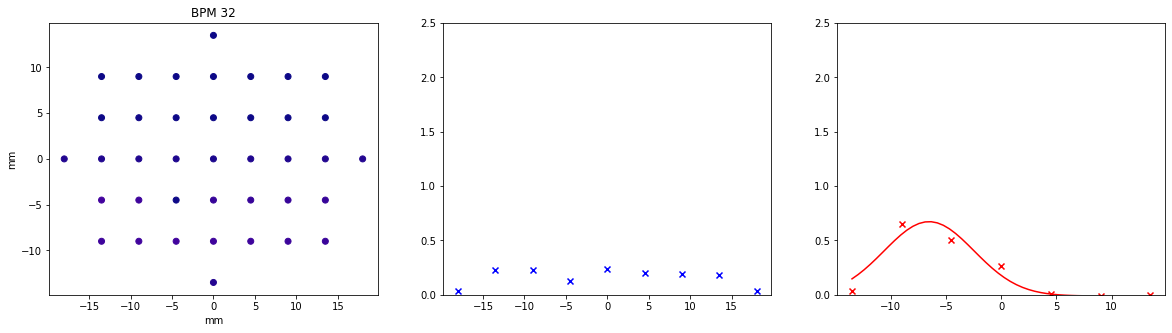

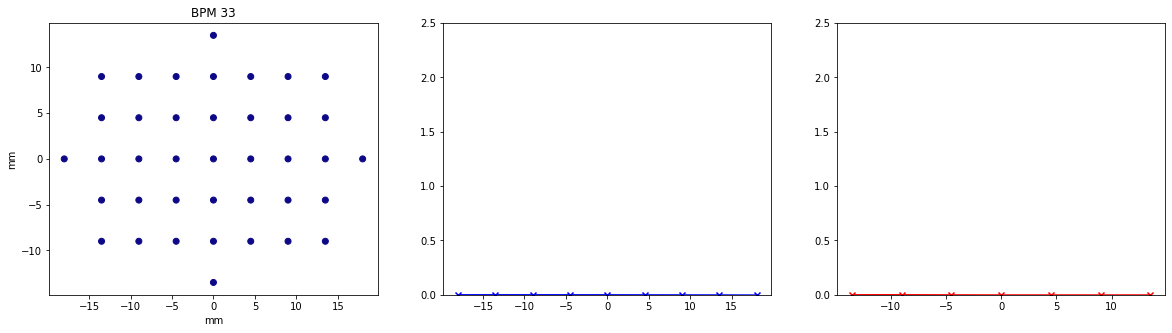

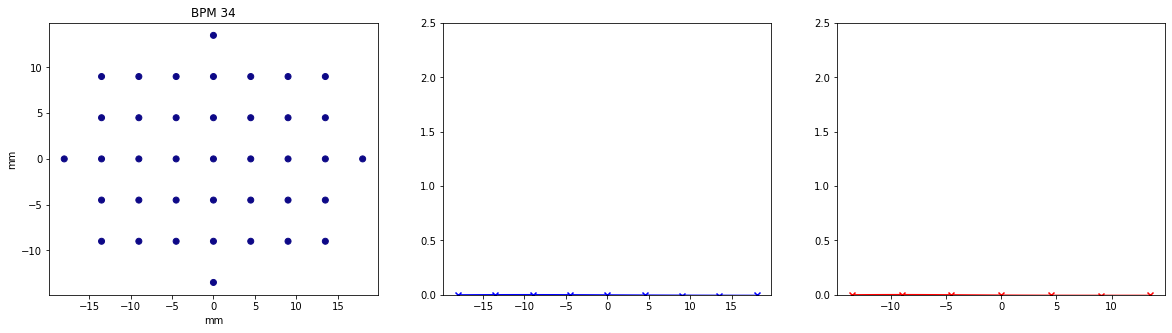

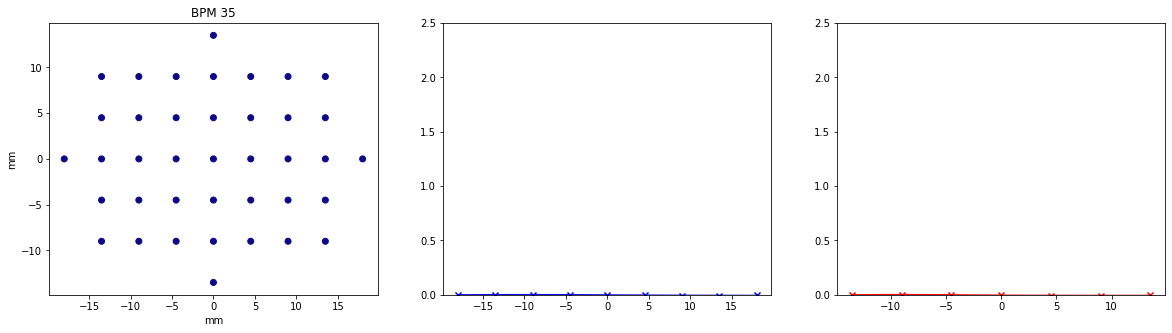

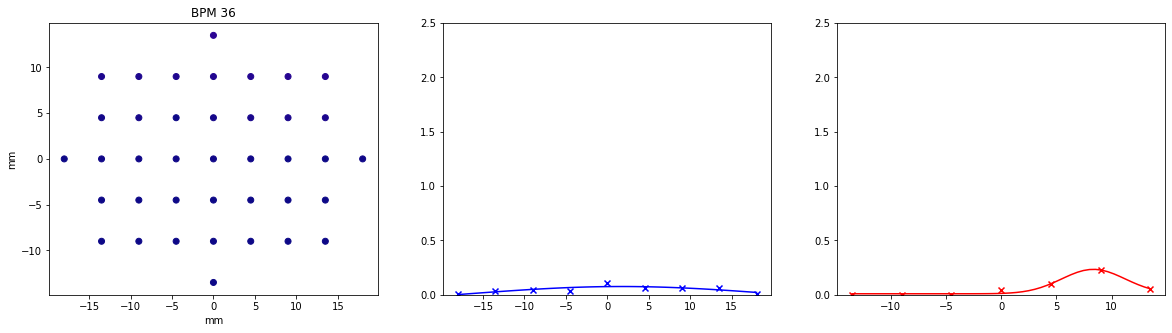

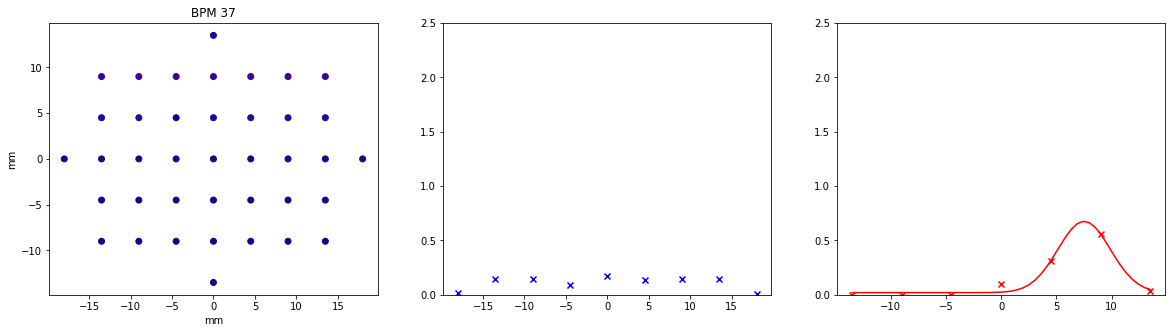

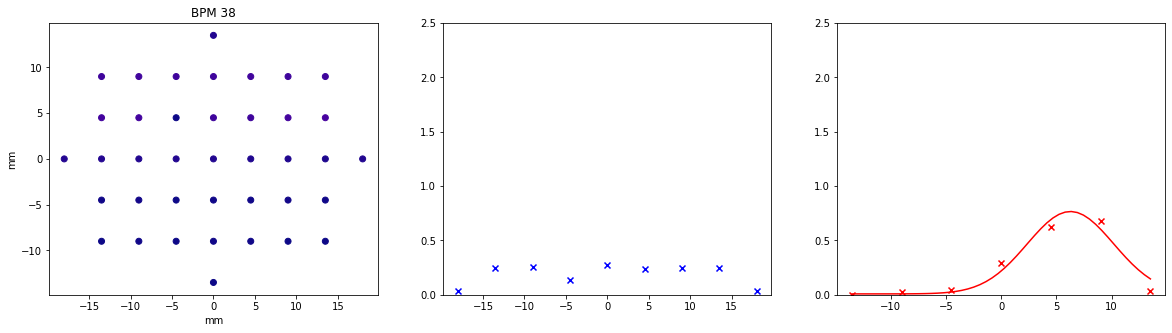

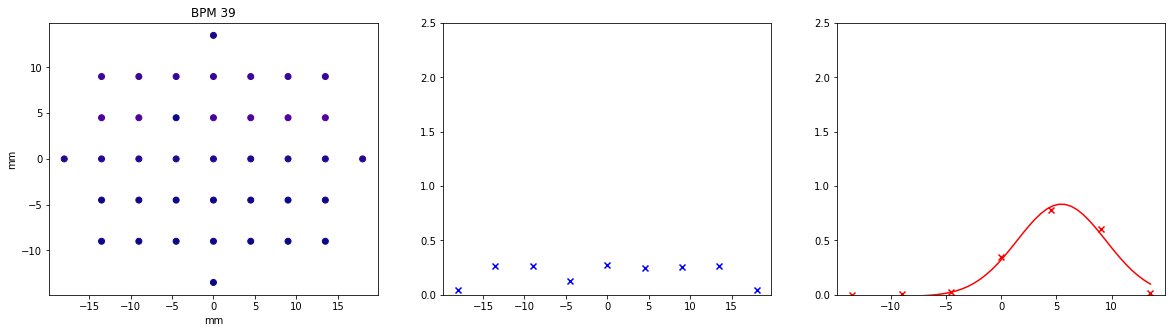

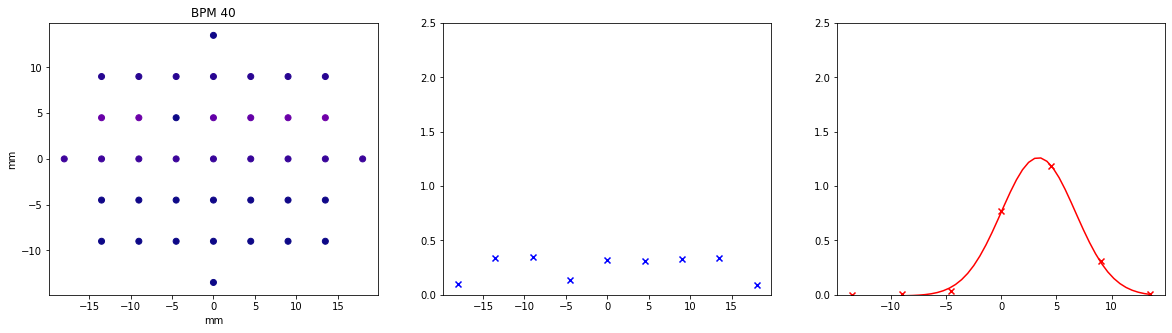

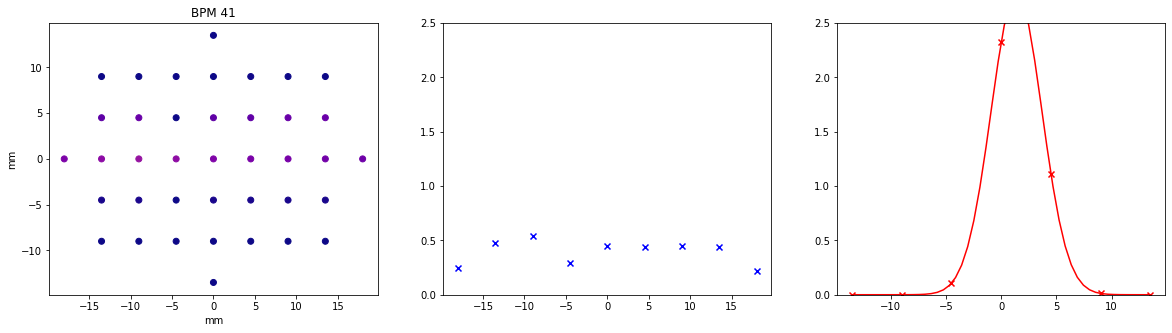

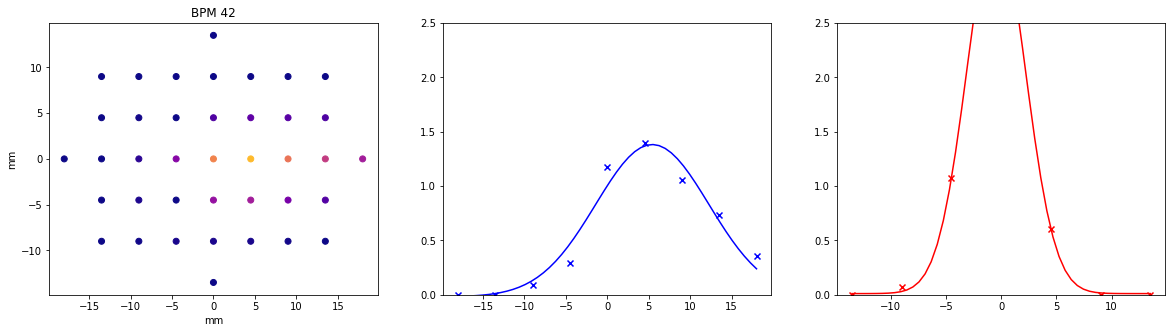

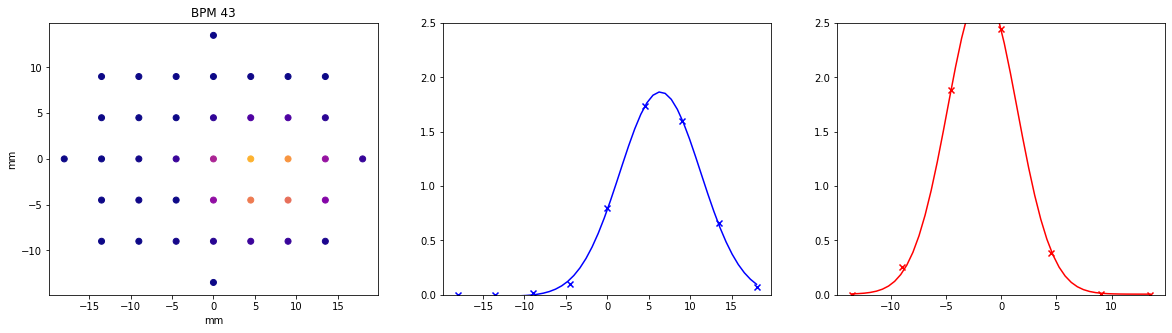

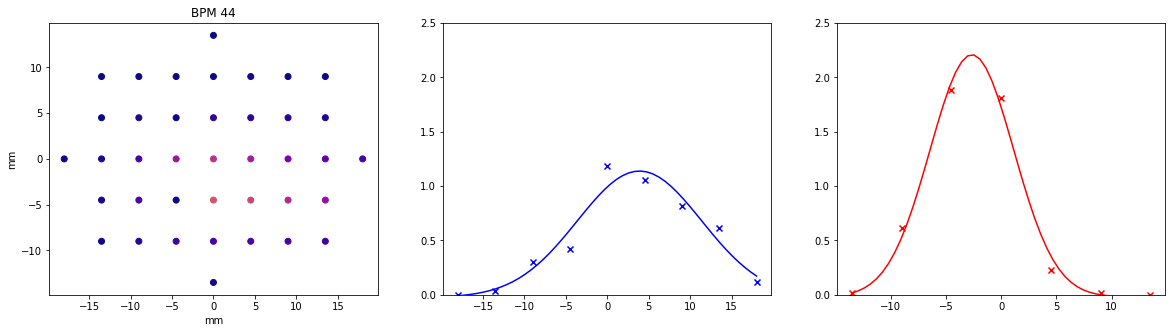

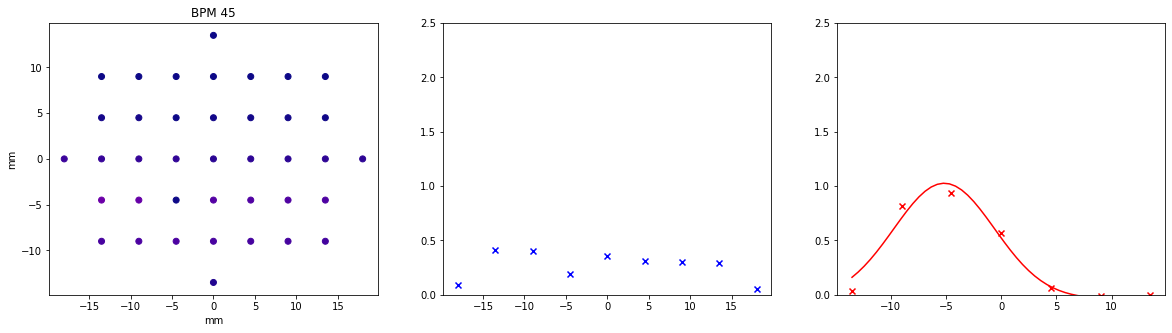

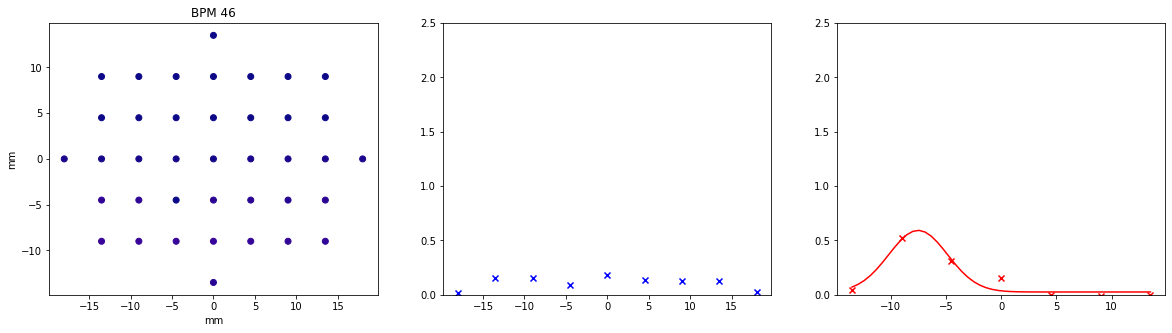

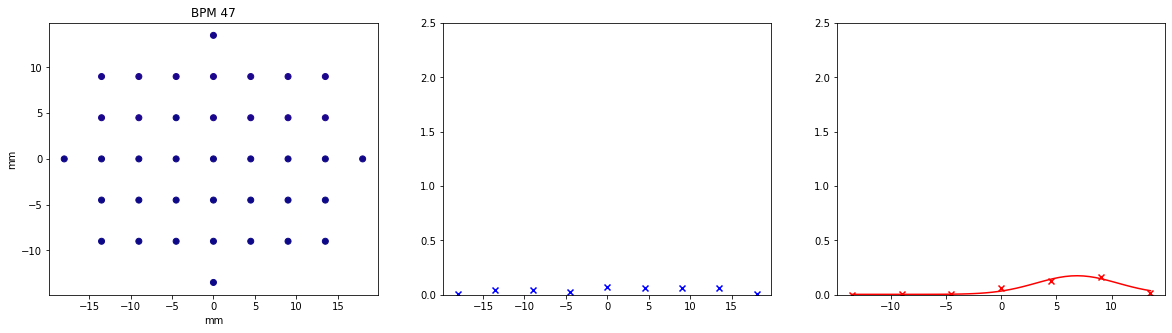

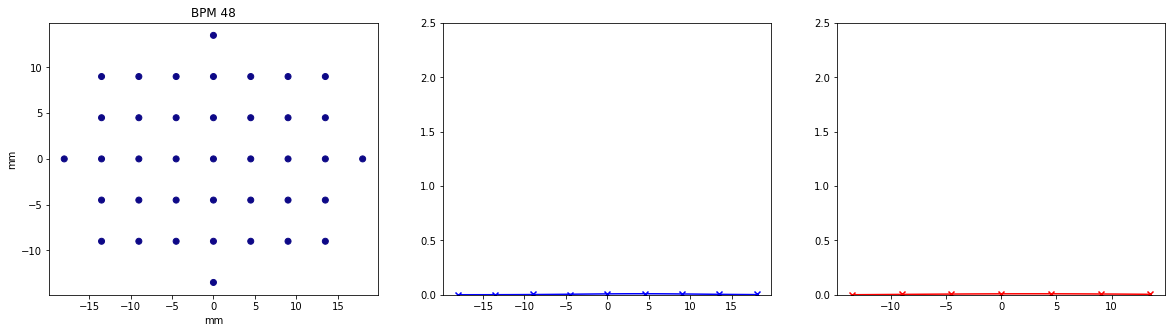

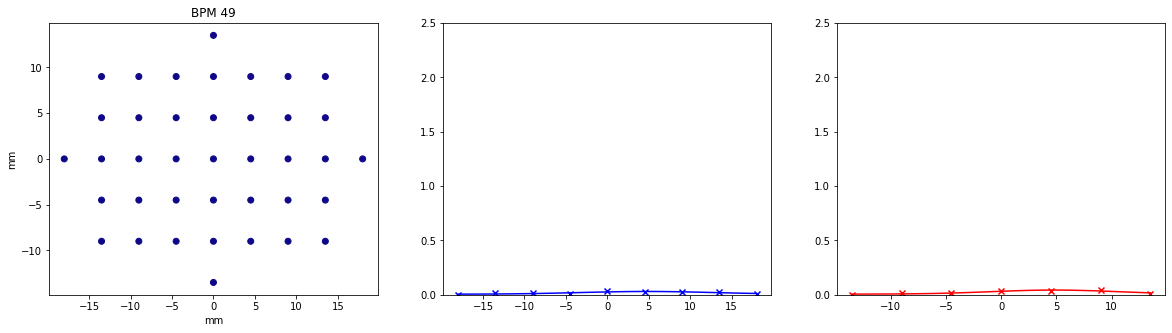

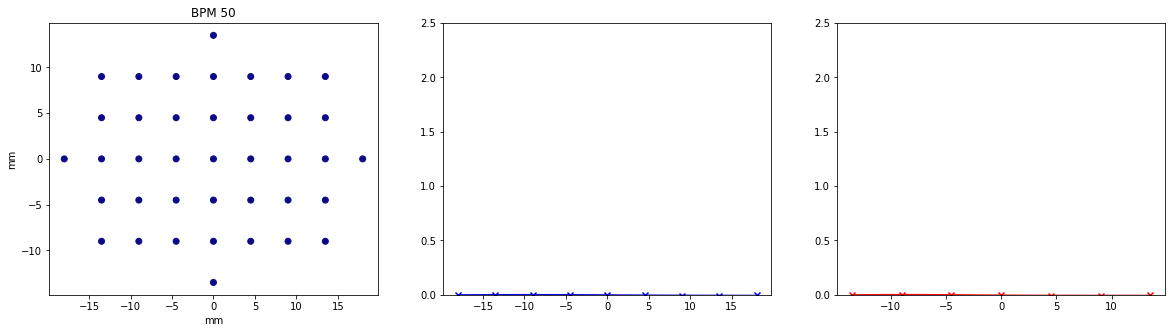

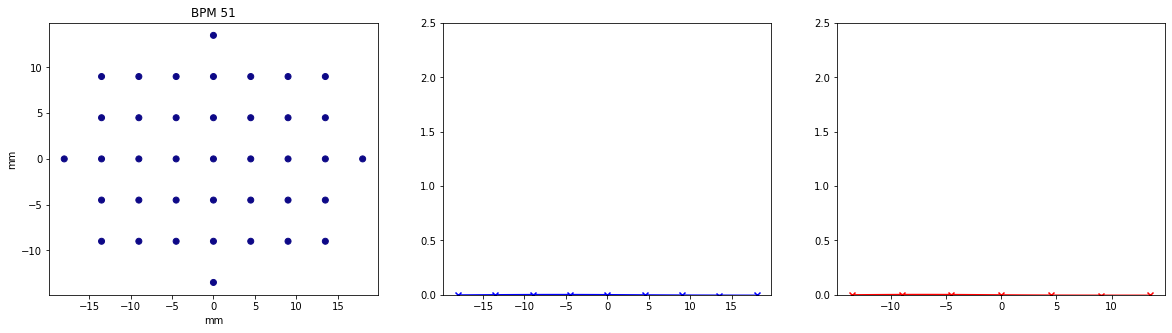

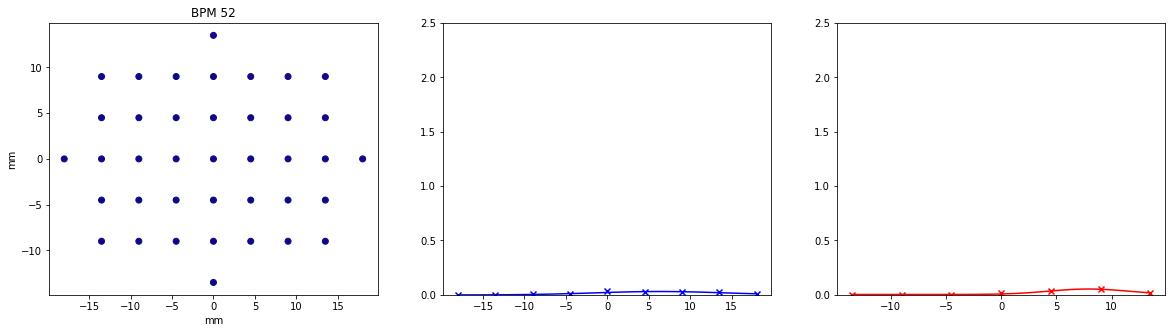

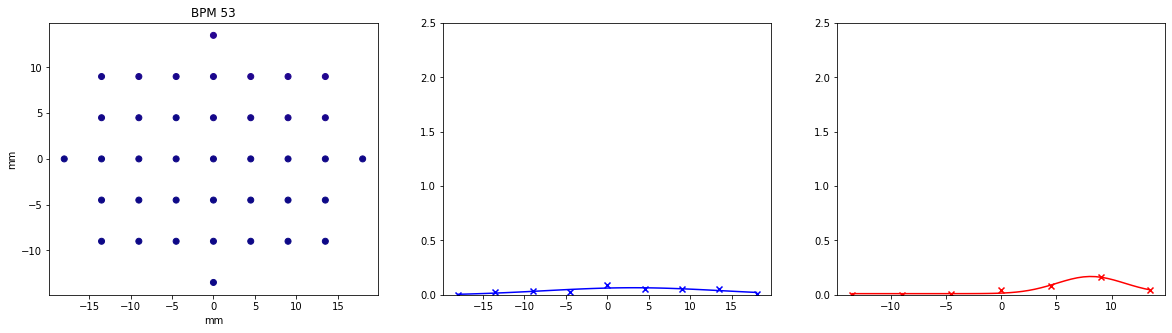

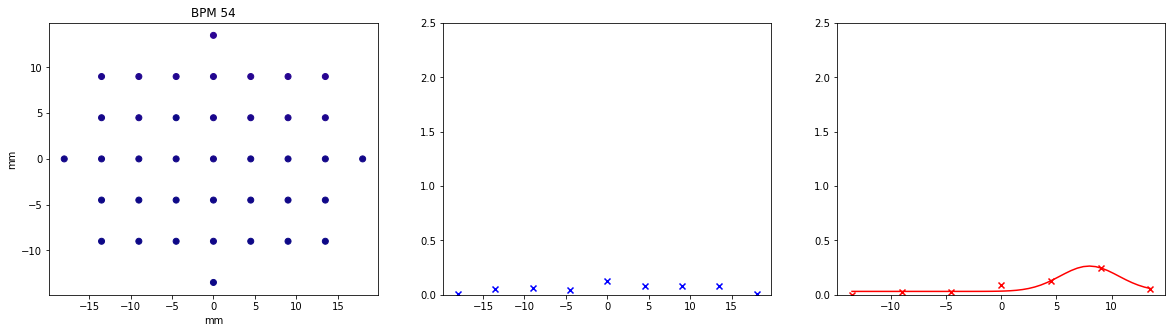

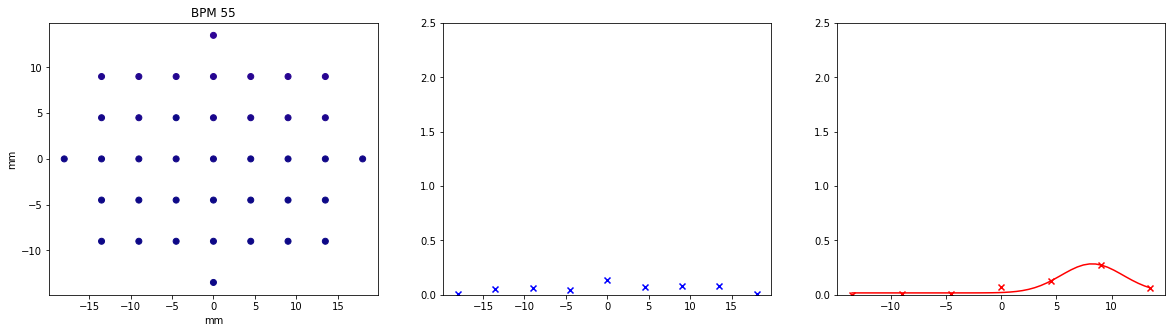

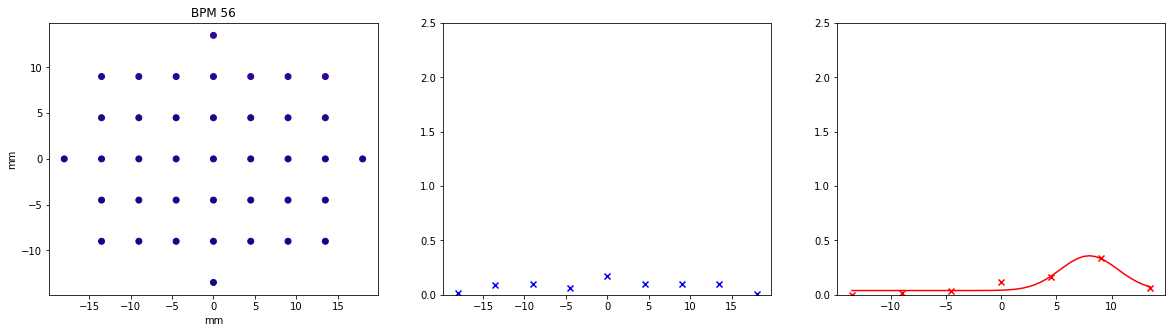

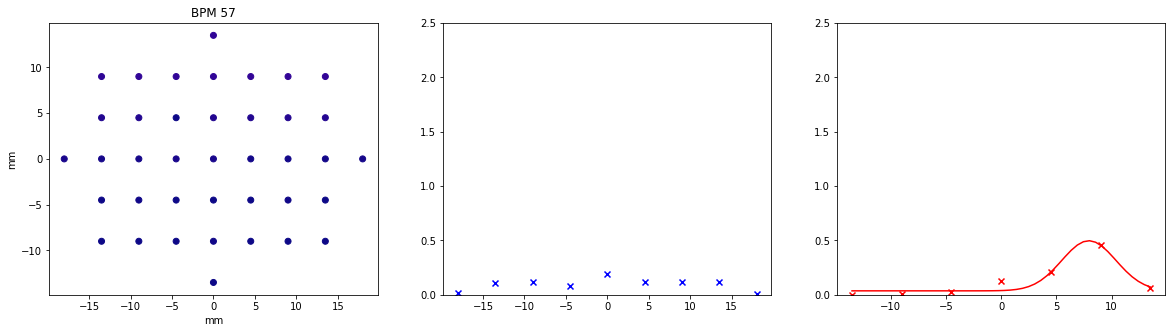

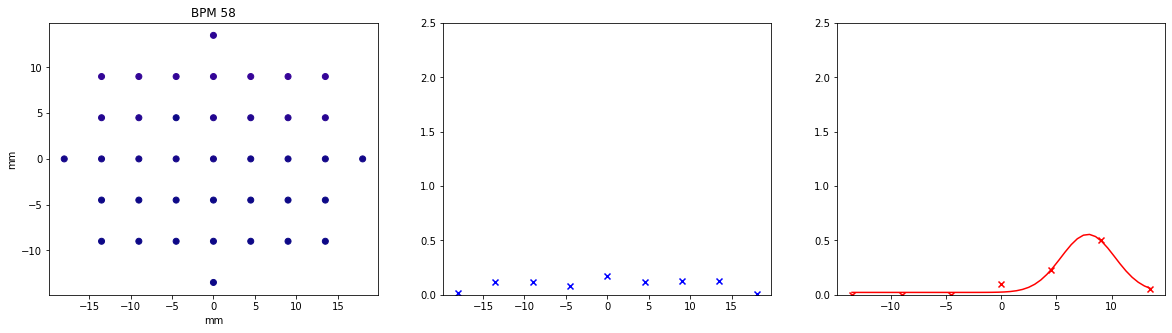

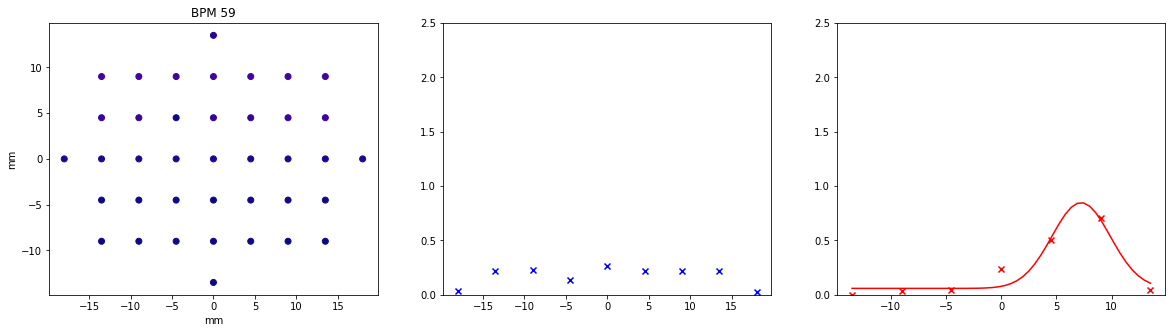

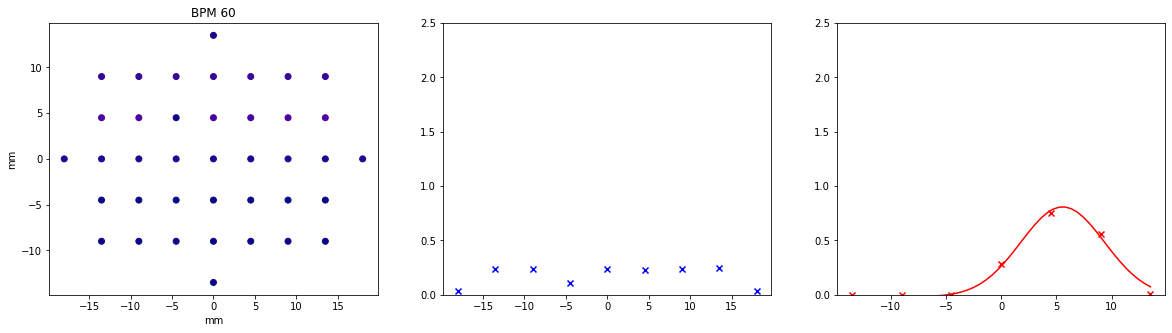

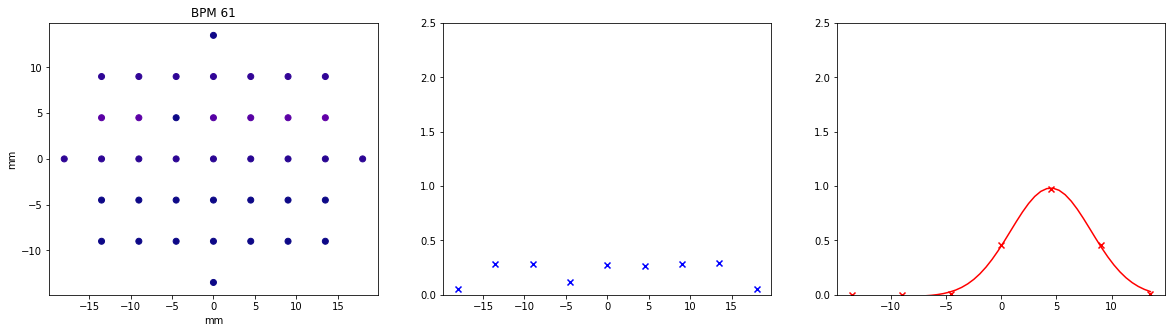

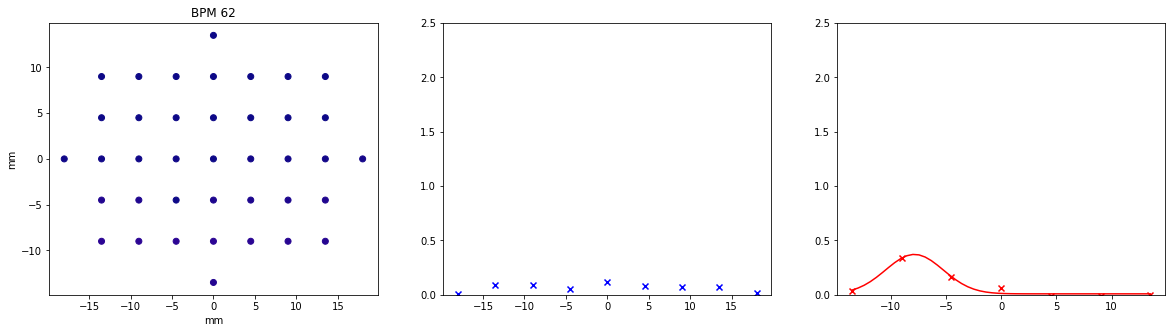

In [177]:
HSigma_list = []
VSigma_list = []

for j in range(len(df)):

    x = df.x[j]["elements"]
    y = df.y[j]["elements"]
    z = df.intensity[j]["elements"]

    x_fix = []
    y_fix = []
    z_fix = []

    for i in range(18):
        x_fix.append(x[i])
        y_fix.append(y[i])
        z_fix.append(z[i])
    for i in range(20):
        i=i+18
        x_fix.append(x[i])
        y_fix.append(y[i])
        z_fix.append(z[i+1])
    x_fix.append(x[-1])
    y_fix.append(y[-1])
    z_fix.append(z[18])

    z_fix = np.array(z_fix)
    
    bpm_df = pd.DataFrame()
    for i in range(len(x)):
        df2 = pd.DataFrame({"x": [x_fix[i]],
                              "y": [y_fix[i]],
                               "intensity": [z_fix[i]-z_fix_background[i]],
                              })

        bpm_df = pd.concat([bpm_df, df2])
    bpm_df.head(5)
    
    h_proj = []
    for k in range(len((bpm_df.x.unique()))):
        proj = bpm_df.loc[bpm_df.x == np.sort(bpm_df.x.unique())[k]].intensity.sum()
        h_proj.append(proj)
    h_proj
    
    v_proj = []
    for l in range(len((bpm_df.y.unique()))):
        proj = bpm_df.loc[bpm_df.y == np.sort(bpm_df.y.unique())[l]].intensity.sum()
        v_proj.append(proj)
    v_proj
    
    # Plot
    fig, ax = plt.subplots(1,3, figsize=(20,5))

    ax[0].scatter(bpm_df.x,bpm_df.y, c=bpm_df.intensity, cmap="plasma",vmin=0, vmax=1)
    ax[0].set_title(f"BPM {j}")
    ax[0].set_xlabel("mm")
    ax[0].set_ylabel("mm")
    
    ax[1].scatter(np.sort(bpm_df.x.unique()), h_proj, marker="x", color="b")
    ax[2].scatter(np.sort(bpm_df.y.unique()), v_proj, marker="x", color="r")
    
    Hx = np.sort(bpm_df.x.unique())
    Hy = np.array(h_proj)
    x_fit = np.linspace(-18, 18 ,50)
    try:
        popt, pcov = do_gaussian_fit(Hx, Hy)
        HSigma_list.append(abs(popt[3]))
        ax[1].plot(x_fit, gaussian_function(x_fit, popt[0], popt[1], popt[2], popt[3]), color="b", label=f"H fitsigma={popt[3]}")
    except:
        HSigma_list.append(np.nan)
        pass
    
    Hx = np.sort(bpm_df.y.unique())
    Hy = np.array(v_proj)
    x_fit = np.linspace(-13.5, 13.5 ,50)
    try:
        popt, pcov = do_gaussian_fit(Hx, Hy)
        VSigma_list.append(abs(popt[3]))
        ax[2].plot(x_fit, gaussian_function(x_fit, popt[0], popt[1], popt[2], popt[3]), color="r", label=f"V fit sigma={popt[3]}")
    except:
        VSigma_list.append(np.nan)
        pass
    
    ax[1].set_ylim(0,2.5)
    ax[2].set_ylim(0,2.5)
#     ax[1].legend()
#     ax[2].legend()

In [166]:
import pickle

madxdf = pickle.load( open( "/eos/user/e/eljohnso/SWAN_projects/acc-models-tls-eliott-fork/ps_extraction/east-fast-extraction/madx_df.pickle", "rb" ) )

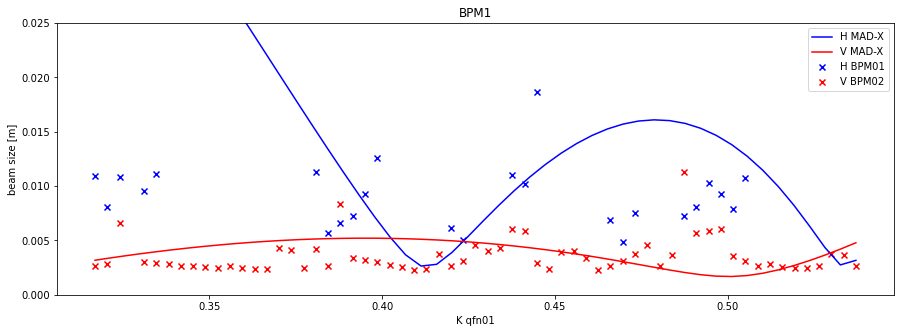

In [178]:
current1 = np.linspace(0.317, 0.537, 63) 
fig, ax = plt.subplots(figsize=(15,5))
ax.scatter(current1, np.array(HSigma_list)/1000, marker="x", color="b", label="H BPM01")
ax.scatter(current1, np.array(VSigma_list)/1000, marker="x", color="r", label="V BPM02")


x = madxdf.loc[madxdf.observation_point == "t08.bpm073"].kfn01 
y = madxdf.loc[madxdf.observation_point == "t08.bpm073"].sigH

ax.plot(x,y, color = "blue", label ="H MAD-X")
y = madxdf.loc[madxdf.observation_point == "t08.bpm073"].sigV

ax.plot(x,y, color = "red", label = "V MAD-X")

ax.set_xlabel("K qfn01")
ax.set_ylabel("beam size [m]")
ax.set_title("BPM1")
ax.set_ylim(0,0.025)
ax.legend()

# Recreate BPM from Irrad Vistar

In [22]:
# build the query and load data into spark dataframe UTC Time
start = "2022-07-21 14:55:00.000"
end = "2022-07-21 14:59:00.000"
df = DevicePropertyDataQuery.builder(spark).system("CMW").startTime(start).endTime(end).entity().parameter("IRRAD_BPM1/Acquisition").build().toPandas()

In [23]:
df.head(1)

__record_timestamp__  __record_version__             acqStamp      class  \
0   1658415531000000000                   0  1658415531000000000  IRRAD_BPM   

   cyclestamp      device                                          intensity  \
0           0  IRRAD_BPM1  {'elements': [0.07969995, 0.024449952, 0.05544...   

      property selector                                                  x  \
0  Acquisition     None  {'elements': [-4.5, -4.5, 0.0, -9.0, 0.0, -9.0...   

                                                   y  nxcals_entity_id  
0  {'elements': [-9.0, -4.5, -9.0, -9.0, -13.5, -...          51590199

In [24]:
for i in range(len(df)):
    print (datetime.fromtimestamp(df.acqStamp[i]/1000000000))

2022-07-21 16:58:51
2022-07-21 16:58:10
2022-07-21 16:58:05
2022-07-21 16:57:28
2022-07-21 16:55:21
2022-07-21 16:55:03
2022-07-21 16:57:36
2022-07-21 16:56:46
2022-07-21 16:56:27
2022-07-21 16:56:12
2022-07-21 16:55:30
2022-07-21 16:55:17
2022-07-21 16:58:18
2022-07-21 16:57:52
2022-07-21 16:57:23
2022-07-21 16:57:10
2022-07-21 16:56:54
2022-07-21 16:55:46
2022-07-21 16:59:00
2022-07-21 16:58:34
2022-07-21 16:56:04
2022-07-21 16:55:59


Text(0.5, 1.0, 'BPM1')

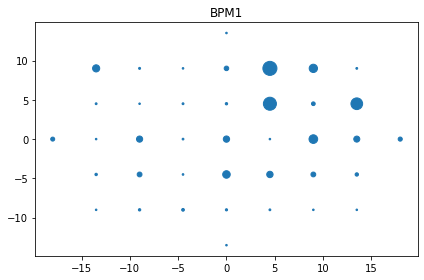

In [6]:
i = 0
x = df.x[i]["elements"]
y = df.y[i]["elements"]
z = df.intensity[i]["elements"]

fig, ax = plt.subplots(tight_layout=True)
ax.scatter(x, y, z*100,)
ax.set_title("BPM1")

In [7]:
# build the query and load data into spark dataframe UTC Time
start = "2022-07-21 14:00:00.000"
end = "2022-07-21 18:30:00.000"
df = DevicePropertyDataQuery.builder(spark).system("CMW").startTime(start).endTime(end).entity().parameter("IRRAD_BPM1/Acquisition").build().toPandas()

Text(0.5, 1.0, 'BPM1')

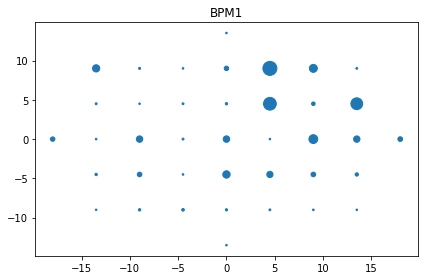

In [8]:
i = 0
x = df.x[i]["elements"]
y = df.y[i]["elements"]
z = df.intensity[i]["elements"]

fig, ax = plt.subplots(tight_layout=True)
ax.scatter(x, y, z*100,)
ax.set_title("BPM1")

Text(0.5, 1.0, '2022-07-21 20:30:00 LT')

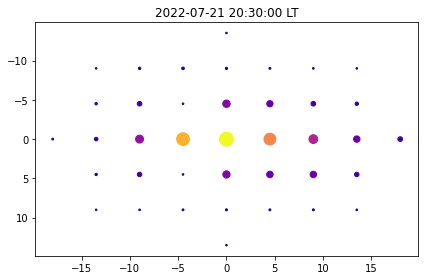

In [9]:
j = 0
x = df.iloc[j].x["elements"]
y = df.iloc[j].y["elements"]
z = df.iloc[j].intensity["elements"]

x_fix = []
y_fix = []
z_fix = []

for i in range(18):
    x_fix.append(x[i])
    y_fix.append(y[i])
    z_fix.append(z[i])
for i in range(20):
    i=i+18
    x_fix.append(x[i])
    y_fix.append(y[i])
    z_fix.append(z[i+1])
x_fix.append(x[-1])
y_fix.append(y[-1])
z_fix.append(z[18])

z_fix = np.array(z_fix)

fig, ax = plt.subplots(tight_layout=True)
ax.scatter(x_fix, y_fix, c=z_fix, s=z_fix*100, cmap="plasma")
ax.set_title("BPM1")
ax.invert_yaxis()
ax.set_title(f"{datetime.fromtimestamp(df.iloc[j].acqStamp/1000000000)} LT")

Text(0.5, 1.0, '2022-07-21 20:30:00 LT')

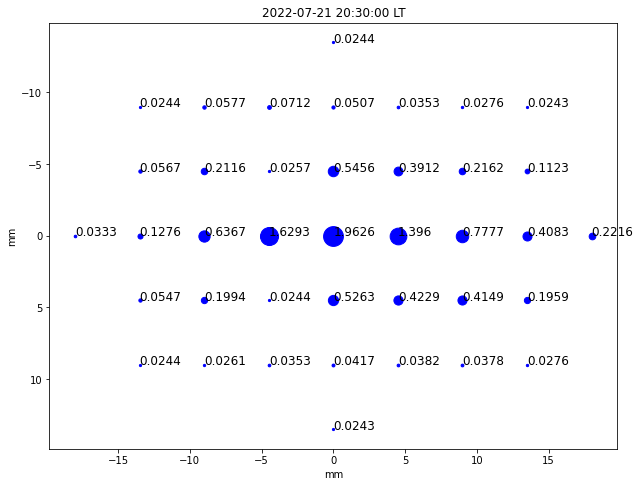

In [10]:
j = 0
x = df.iloc[j].x["elements"]
y = df.iloc[j].y["elements"]
z = df.iloc[j].intensity["elements"]

fig, ax = plt.subplots(figsize=(9,9), tight_layout=True)
for i in range(18):
#     print(f"i {i},   {x[i]},   {y[i]}    {z[i]}")
    ax.scatter(x[i], y[i], z[i]*200, color="b")
    plt.text(x[i], y[i], round(z[i],4), fontsize=12)
for i in range(20):
    i=i+18
#     print(f"i {i},   {x[i]},   {y[i]}    {z[i]}")
    ax.scatter(x[i], y[i], z[i+1]*200, color="b")
    plt.text(x[i], y[i], round(z[i+1],4), fontsize=12)
ax.scatter(x[-1], y[-1], z[18]*200, color="b")
# print(f"last,   {x[-1]},   {y[-1]}    {z[18]}")
plt.text(x[-1], y[-1], round(z[18],4), fontsize=12)
ax.set_title("BPM1")
ax.invert_yaxis()
ax.set_xlabel("mm")
ax.set_ylabel("mm")
ax.set_aspect("equal")
ax.set_title(f"{datetime.fromtimestamp(df.iloc[j].acqStamp/1000000000)} LT")

In [11]:
x = df.x[0]["elements"]
y = df.y[0]["elements"]
z = df.intensity[0]["elements"]

print (f"x = {x}")
print (f"y = {y}")
print (f"intensity = {z}")

x = [ -4.5  -4.5   0.   -9.    0.   -9.    0.  -13.5   4.5 -13.5   4.5  18.
   9.   13.5   9.   13.5  13.5   9.    4.5  13.5 -18.   13.5 -13.5   9.
  -9.    9.   -4.5   4.5   0.    4.5 -13.5   0.  -13.5   0.   -9.    0.
  -9.   -4.5  -4.5]
y = [ -9.   -4.5  -9.   -9.  -13.5  -4.5  -4.5  -9.   -9.   -4.5  -4.5   0.
  -9.    0.   -4.5  -4.5  -9.    0.    0.    4.5   0.    9.    0.    4.5
   0.    9.    0.    4.5   0.    9.    4.5   4.5   9.   13.5   4.5   9.
   9.    9.    4.5]
intensity = [0.07119995 0.02569995 0.05069995 0.05769995 0.02444995 0.21157496
 0.54557496 0.02444995 0.03532495 0.05669995 0.39119995 0.22157495
 0.02757495 0.40832496 0.21619995 0.11232495 0.02432495 0.77769995
 0.02444995 1.39595    0.19594996 0.03332495 0.02757495 0.12757495
 0.41494995 0.6367     0.03782495 1.6293249  0.42294994 1.962575
 0.03819995 0.05469995 0.5263249  0.02444995 0.02432495 0.19944996
 0.04169995 0.02607495 0.03532495]


In [12]:
z[19]

1.39595

Text(0, 0.5, 'y mm')

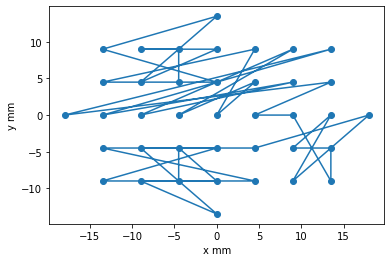

In [13]:
fig, ax = plt.subplots()
ax.plot(x,y, marker="o")
ax.set_xlabel("x mm")
ax.set_ylabel("y mm")